<a href="https://colab.research.google.com/github/dgsob/SF2526-VT25/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Install Jullia, then reload

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.11.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia Pkg Plots"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.11.2 on the current Colab Runtime...
2025-01-21 16:41:12 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.11/julia-1.11.2-linux-x86_64.tar.gz [285843560/285843560] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.11

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Homework 1

In [ ]:
using LinearAlgebra
using Plots

## Exercise 1

"We shall investigate Gram-Schmidt by column elimination (Algo-
rithm 1 in EJ1)."

### Part (a)

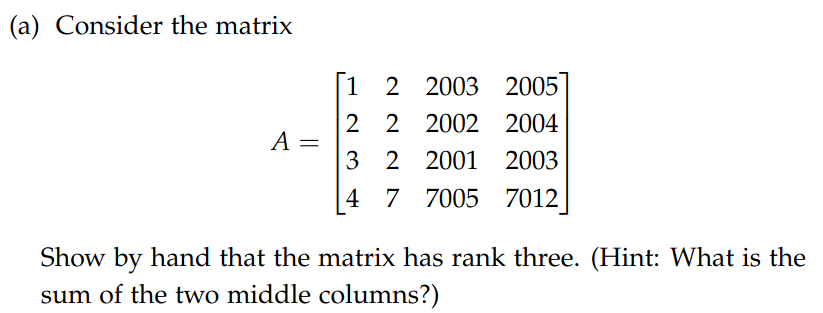

The sum of middle columns (Column 2 and Column 3) equal Column 4:

$Column 2 + Column 3 =
\begin{bmatrix}
2 \\ 2 \\ 2 \\ 7
\end{bmatrix}
+
\begin{bmatrix}
2003 \\ 2002 \\ 2001 \\ 7005
\end{bmatrix}
=
\begin{bmatrix}
2 + 2003 \\ 2 + 2002 \\ 2 + 2001 \\ 7 + 7005
\end{bmatrix}
=
\begin{bmatrix}
2005 \\ 2004 \\ 2003 \\ 7012
\end{bmatrix}
= Column 4$

This shows that column 4 is linearly dependent on columns 2 and 3, and thus the matrix has rank at most 3.

Next, we will calculate $det(B)$ where $B$ is a minor of matrix $A$ of order 3, e.g.:

$B =
\begin{bmatrix}
2 & 2 & 2002 \\
3 & 2 & 2001 \\
4 & 7 & 7005
\end{bmatrix}
$

If there exists any maximum possible order non-zero minor then rank of $A$ equals order of that particular minor.

Thus, if $det(B) \neq 0$, then rank of $A$ equals 3.
$det(B) = 2*2*7005 + 2*2001*4 + 2002*3*7 - 2002*2*4 - 2*3*7005 - 2*2001*7 = 10 \neq 0$

### Part (b)

In [ ]:
A = [1 2 2003 2005;
     2 2 2002 2004;
     3 2 2001 2003;
     4 7 7005 7012]

println("Matrix A:")
display(A)

Matrix A:


4×4 Matrix{Int64}:
 1  2  2003  2005
 2  2  2002  2004
 3  2  2001  2003
 4  7  7005  7012

In [ ]:
function gram_schmidt_qr(A)
    m, n = size(A)
    Q = zeros(Float64, m, n)
    R = zeros(Float64, n, n)

    for j in 1:n
        i = j
        v = A[:, i]
        for k in 1:(j - 1)
            R[k, j] = dot(Q[:, k], v)
            v -= R[k, j] * Q[:, k]
        end
        R[j, j] = norm(v)
        Q[:, j] = v / R[j, j]
    end

    return Q, R
end

gram_schmidt_qr (generic function with 1 method)

In [ ]:
Q, R = gram_schmidt_qr(A)

println("Q:")
display(Q)

println("R:")
display(R)

Q:


4×4 Matrix{Float64}:
 0.182574   0.240772   0.861411  -0.12105
 0.365148  -0.240772   0.376867  -0.378405
 0.547723  -0.722315  -0.107676  -0.762763
 0.730297   0.601929  -0.323029  -0.510245

R:


4×4 Matrix{Float64}:
 5.47723  7.30297  7308.44     7315.75
 0.0      2.76887  2771.4      2774.17
 0.0      0.0         1.61515     1.61515
 0.0      0.0         0.0         8.9515e-13

In [ ]:
# Ensure the factorization is yielding the expected result:
println("A ≈ Q * R:")
println(isapprox(A, Q * R, atol=1e-10))

A ≈ Q * R:
true


In [ ]:
function compute_errors(A, Q, R)
    m, n = size(A)
    errors = Float64[]
    A_j = copy(A)

    for j in 1:n
        A_j = A_j - Q[:, j] * R[j, :]'

        # Compute the Frobenius norm of A_j
        push!(errors, norm(A_j))
    end

    return errors
end

compute_errors (generic function with 1 method)

In [ ]:
errors = compute_errors(A, Q, R)

4-element Vector{Float64}:
 3921.3153405458224
    2.284160962880535
    8.951503046932902e-13
    5.551115123125783e-16

In [ ]:
function plot_errors(errors; title="Convergence of ‖A_j‖ (Log Scale)", xlabel="Iteration", ylabel="‖A_j‖")
    plot(1:length(errors), errors,
         xlabel=xlabel, ylabel=ylabel,
         label=ylabel, marker=:circle,
         yscale=:log10)
    title!(title)
end

plot_errors (generic function with 1 method)

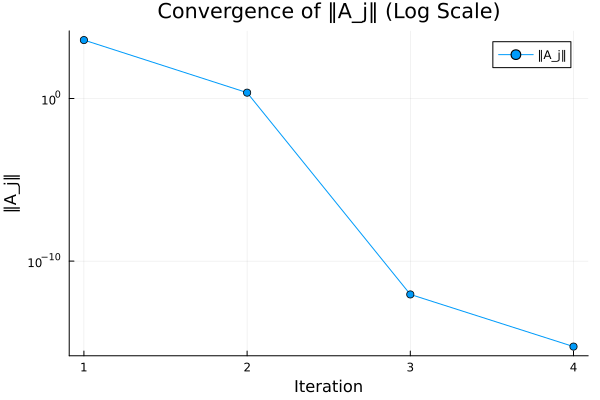

In [ ]:
plot_errors(errors)

### Part (c)

In [ ]:
# The matlab function is:

#function Z=load_mat_hw1(n,p)
#   randn('seed',0)
#   p1=floor(3*p/4)
#   p2=p-p1;

#   Q=randn(n,p1);
#   Z1=Q*diag(randn(1,p1).*exp(-abs(1:p1)))*randn(p1,p1);
#   [~,I]=sort(sum(abs(Z1),1))
#   Z1=Z1(:,I);

#   Q=randn(n,p2);
#   Z2=Q*diag(randn(1,p2).*exp(-abs(1:p2)))*randn(p2,p2);
#   Z=[Z1,Z2];
#end

# And our Julia port:
using Random

function load_mat_hw1(n, p)
    Random.seed!(0)
    p1 = floor(Int, 3 * p / 4)
    p2 = p - p1

    Q = randn(n, p1)
    Z1 = Q * Diagonal(randn(p1) .* exp.(-abs.(1:p1))) * randn(p1, p1)
    col_sums = sum(abs.(Z1), dims=1)
    I = sortperm(col_sums[:])
    Z1 = Z1[:, I]

    Q = randn(n, p2)
    Z2 = Q * Diagonal(randn(p2) .* exp.(-abs.(1:p2))) * randn(p2, p2)
    Z = [Z1 Z2]

    return Z
end

load_mat_hw1 (generic function with 1 method)

In [ ]:
Z = load_mat_hw1(1000, 100)

1000×100 Matrix{Float64}:
  0.01337      -0.00400439    0.0233501    0.025918     …   0.00534018  -0.452297     0.123732
  0.0111438     0.0169241    -0.00361059  -0.0231209        0.104134     0.332875    -0.00444376
  0.0206384     0.00514924    0.0210416    0.0147785       -0.063968     0.555561    -0.162248
  0.0139797    -0.0189215     0.0505569   -0.00336846       0.174626    -0.281351     0.149288
 -0.00307841   -0.0254758     0.029594     0.0184129       -0.0634286    0.151049    -0.0424714
  0.0349478     0.0444387    -0.0166602   -0.0140918    …  -0.117338    -0.0514298   -0.110549
  0.00113804    0.0182898    -0.0325799    0.0185308       -0.10029      0.130462    -0.0325509
 -0.0148205    -0.00582368   -0.0180523    0.0258164        0.0553853    0.00937202   0.0154526
  0.000198511   0.0209121    -0.0249126   -0.00315582       0.0288907   -0.248437     0.0665728
 -0.00591076    0.0287777    -0.0504912   -0.00850781       0.0407174   -0.0456846    0.0853785
 -0.0130999     0

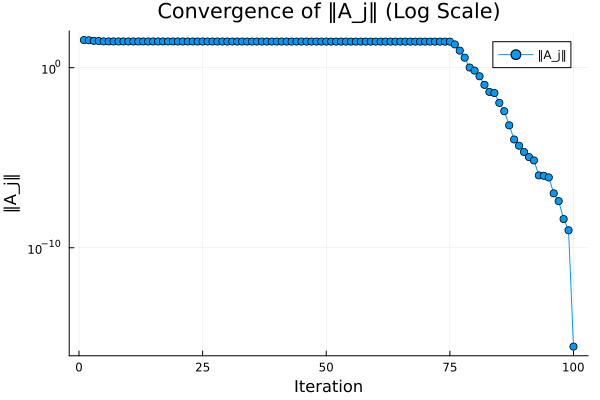

In [ ]:
Q, R = gram_schmidt_qr(Z)
errors = compute_errors(Z, Q, R)
plot_errors(errors)

### Part (d)

In [ ]:
function gram_schmidt_qr_greedy(A)
    m, n = size(A)
    Q = zeros(Float64, m, n)
    R = zeros(Float64, n, n)
    column_order = collect(1:n)  # To keep track of column swaps

    for j in 1:n
        # Find the column with the maximum Frobenius norm among the remaining columns
        remaining_cols = j:n
        norms = [norm(A[:, i], 2) for i in remaining_cols]
        max_idx = argmax(norms)
        i = remaining_cols[max_idx]  # i is the index of the column with max norm

        # Swap columns if necessary
        if i != j
            A[:, [j, i]] = A[:, [i, j]]
            column_order[[j, i]] = column_order[[i, j]]
            # Also swap the corresponding columns in R that have already been computed
            R[1:j-1, [j, i]] = R[1:j-1, [i, j]]
        end

        # Perform Gram-Schmidt on the selected column
        v = A[:, j]
        for k in 1:(j - 1)
            R[k, j] = dot(Q[:, k], v)
            v -= R[k, j] * Q[:, k]
        end
        R[j, j] = norm(v, 2)
        Q[:, j] = v / R[j, j]
    end

    # Reorder R to reflect the column swaps
    R = R[:, column_order]

    return Q, R
end

gram_schmidt_qr_greedy (generic function with 1 method)

Z ≈ Q * R:
true


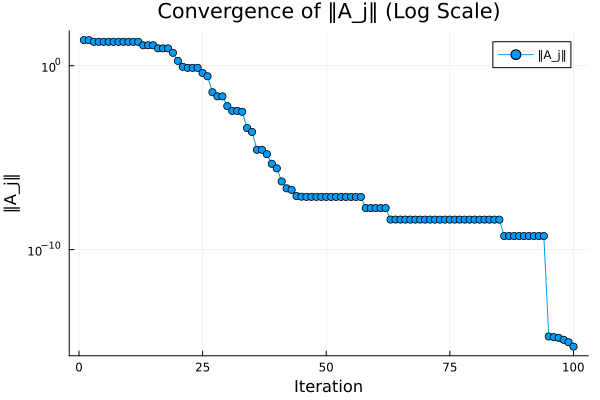

In [ ]:
Q, R = gram_schmidt_qr_greedy(Z)
println("Z ≈ Q * R:")
println(isapprox(Z, Q * R, atol=1e-10))
errors = compute_errors(Z, Q, R)
plot_errors(errors)

We can see that we managed to obtain a significant improvement with the greedy approach - the error gets smaller faster.

Why is the greedy algorithm better than standard, if we want an approximation of the span of the columns?

This is because the greedy algorithm selects the column with the largest norm at each step. Columns with larger norms typically contribute more significantly to the span of the matrix (a vector with a large norm "reaches further" in space). By processing these columns first, the algorithm captures the "most important" directions in the data early, leading to a better approximation of the span with fewer vectors. This is analogous to PCA, where components are ordered by explained variance.

##Exercise 2

### Part (a)

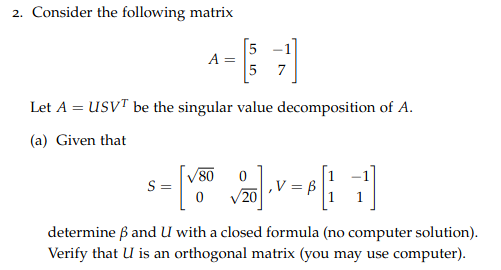

Step 1: determine $β$.

$V = β ⋅ \begin{bmatrix} 1 & -1 \\ 1 & 1 \end{bmatrix}$

$V$ should be orthogonal.
In order for $V$ to be orthogonal, the columns must be orthonormal, i.e.:
- be orthogonal
- have unit length

Columns $\begin{bmatrix} 1 \\ 1 \end{bmatrix}$ and $\begin{bmatrix} -1 \\ 1 \end{bmatrix}$ are orthogonal as their dot product equals 0.
Their norm is $\sqrt{1^2 + 1^2} = \sqrt{ (-1)^2 + 1^2} = \sqrt{2 }$. To have unit length it should be equal to 1, thus if we scale them by $\beta = \frac{1}{\sqrt{2}}$ we obtain desired norm and $V^T V = I$.

Step 2: determine $U$.

$A = USV^T$
$AV = USV^T V$
$AV = US$
$AVS^{-1} = USS^{-1}$
$AVS^{-1} = U \implies U = AVS^{-1}$

$AV = \begin{bmatrix} 5 & -1 \\ 5 & 7 \end{bmatrix}  \frac {1} {\sqrt{2}}  \begin{bmatrix} 1 & -1 \\ 1 & 1 \end{bmatrix} = \frac {1} {\sqrt{2}} \begin{bmatrix} 4 & -6 \\ 12 & 2 \end{bmatrix}$
$S^{-1} = \begin{bmatrix} \frac{1}{\sqrt{80}} & 0 \\ 0 & \frac{1}{\sqrt{20}} \end{bmatrix}$
$U = \frac {1} {\sqrt{2}} \begin{bmatrix} 4 & -6 \\ 12 & 2 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{80}} & 0 \\ 0 & \frac{1}{\sqrt{20}} \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} \frac{4}{\sqrt{80}} & \frac{-6}{\sqrt{20}} \\ \frac{12}{\sqrt{80}} & \frac{2}{\sqrt{20}} \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{10}} & \frac{-3}{\sqrt{10}} \\ \frac{3}{\sqrt{10}} & \frac{1}{\sqrt{10}} \end{bmatrix}$

In [ ]:
U = [1/√10  -3/√10;
     3/√10   1/√10]

# Check orthogonality: U^T * U should equal the identity matrix
println("Is U orthogonal? ", U' * U ≈ I(2)) # I(2) in Julia is a 2x2 identity matrix

# Display U^T * U
println("\nU^T * U =")
display(round.(U' * U, digits=6))

Is U orthogonal? true

U^T * U =


2×2 Matrix{Float64}:
 1.0  0.0
 0.0  1.0

### Part (b)

We will extract $\sigma_1$ and its corresponding singular vectors $u_1$ and $v_1$, construct $X = \sigma_1u_1v_1^T$, compute the error $|| A - X ||$ and compare it with $\sigma_2$ which is a theoretical value for this error.

In [ ]:
# Define all the matrices from the exercise

A = [5 -1;
     5  7]

U = [1/√10  -3/√10;
     3/√10   1/√10]

S = [√80  0;
     0   √20]

V = [1/√2  -1/√2;
     1/√2   1/√2];

In [ ]:
σ_1 = S[1, 1]
σ_2 = S[2, 2]
u_1 = U[:, 1]   # First column of U
v_1 = V[:, 1];  # First column of V

In [ ]:
X = σ_1 * u_1 * v_1'
error = norm(A - X)

4.47213595499958

In [ ]:
println("Matrix X:")
display(X)

println("Error ||A - X||: ", error)
println("Theoretical error (σ_2): ", σ_2)

Matrix X:


2×2 Matrix{Float64}:
 2.0  2.0
 6.0  6.0

Error ||A - X||: 4.47213595499958
Theoretical error (σ_2): 4.47213595499958


## Exercise 3

## Exercise 8

In [1]:
import Pkg
Pkg.add("MAT")
using MAT

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed MicrosoftMPI_jll ── v10.1.4+3
   Installed MPIPreferences ──── v0.1.11
   Installed Hwloc_jll ───────── v2.11.2+3
   Installed MPICH_jll ───────── v4.2.3+0
   Installed OpenMPI_jll ─────── v4.1.6+0
   Installed HDF5_jll ────────── v1.14.3+3
   Installed BufferedStreams ─── v1.2.2
   Installed MAT ─────────────── v0.10.7
   Installed MPItrampoline_jll ─ v5.5.1+2
   Installed HDF5 ────────────── v0.17.2
   Installed libaec_jll ──────── v1.1.3+0
    Updating `~/.julia/environments/v1.11/Project.toml`
  [23992714] + MAT v0.10.7
    Updating `~/.julia/environments/v1.11/Manifest.toml`
  [e1450e63] + BufferedStreams v1.2.2
  [f67ccb44] + HDF5 v0.17.2
  [23992714] + MAT v0.10.7
  [3da0fdf6] + MPIPreferences v0.1.11
  [0234f1f7] + HDF5_jll v1.14.3+3
  [e33a78d0] + Hwloc_jll v2.11.2+3
  [7cb0a576] + MPICH_jll v4.2.3+0
  [f1f71cc9] + MPItrampoline_jll v5.5.1+2
  [9237b28f] + MicrosoftMPI_jll

In [2]:
using LinearAlgebra
using Plots

In [3]:
function zalando_plot(z)
    n = 28
    A = reshape(z, n, n)

    za = maximum(abs.(z))
    A = A / za

    B = 1 .- A'

    heatmap(B, color=:grays, aspect_ratio=1)
end

function ID_col(A, kk)
    F = qr(A, ColumnNorm())
    Q = F.Q[:, 1:kk]
    R = F.R[1:kk, :]
    P = F.p

    R11 = R[1:kk, 1:kk]
    R12 = R[1:kk, kk+1:end]

    C = A[:, P[1:kk]]

    I_kk = I(kk)
    P_mat = Matrix(I, size(A,2), size(A,2))[:, P]
    Z = [I_kk inv(R11) * R12] * P_mat'

    return C, Z
end

ID_col (generic function with 1 method)

### Part a)

In [4]:
function best_rank_k(A, k)
    U, S, V = svd(A)
    return U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
end

function relative_error(A, Ã)
    return norm(A - Ã) / norm(A)
end

function plot_errors(A, max_k)
    errors_svd = []
    errors_id = []

    for k in 1:max_k
        # Best rank-k approximation (SVD)
        A_svd_k = best_rank_k(A, k)
        push!(errors_svd, relative_error(A, A_svd_k))

        # ID approximation
        C, Z = ID_col(A, k)
        A_id_k = C * Z
        push!(errors_id, relative_error(A, A_id_k))
    end

    plot(1:max_k, errors_svd, yscale=:log10, label="Best rank k", lw=2)
    plot!(1:max_k, errors_id, yscale=:log10, label="ID rank k", lw=2)
    xlabel!("rank(Ã) = k")
    ylabel!("Relative error")
end

plot_errors (generic function with 1 method)

In [9]:
items = matread("zalando_items.mat")
println(keys(items))

["item6", "item8", "item1", "item9", "item0", "item5", "item4", "item7", "item2", "item3"]


In [10]:
A = items["item3"]

784×6000 Matrix{Float64}:
 0.0       0.0         0.0         0.0         …  0.0        0.0         0.0        0.0
 0.0       0.0         0.0         0.0            0.0        0.0         0.0        0.0
 0.0       0.0         0.0         0.0            0.0        0.0         0.0        0.0
 0.0       0.0         0.0         0.0            0.0        0.0         0.0        0.0
 0.0       0.0         0.0         0.0            0.0        0.0         0.0        0.0
 0.0       0.00392157  0.0         0.0         …  0.0        0.0         0.0        0.0
 0.0       0.0         0.0         0.0            0.0        0.0         0.0        0.0
 0.0       0.0         0.0         0.00392157     0.0        0.0         0.0        0.0
 0.129412  0.0         0.0         0.0            0.0        0.00784314  0.0        0.0
 0.376471  0.254902    0.0         0.0            0.0        0.0         0.0        0.0196078
 0.686275  0.388235    0.0         0.584314    …  0.0        0.0         0.164706   0.05

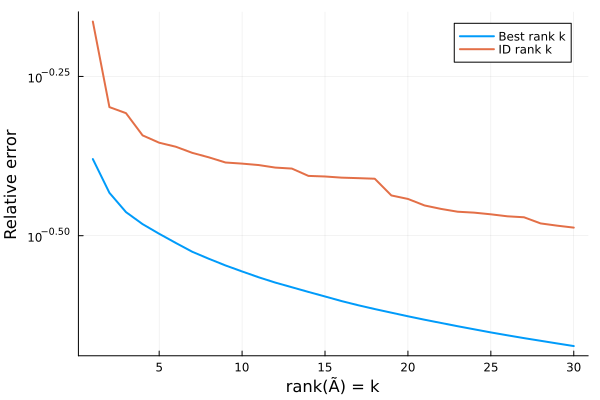

In [11]:
plot_errors(A, 30)

### Part b)

In [13]:
function plot_image(matrix, title)
    img = permutedims(reshape(matrix, 28, 28), (2,1))
    heatmap(img, color=:grays, aspect_ratio=1, title=title, yflip=true)
end

plot_image (generic function with 1 method)

In [16]:
B = items["item9"];

In [17]:
U, S, V = svd(B)
C, Z = ID_col(B, 3);

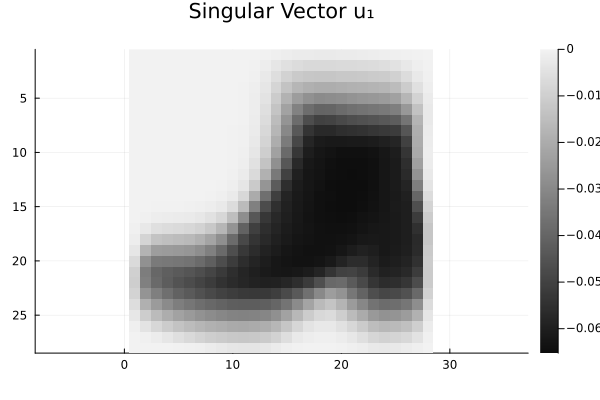

In [18]:
plot_image(U[:, 1], "Singular Vector u₁")

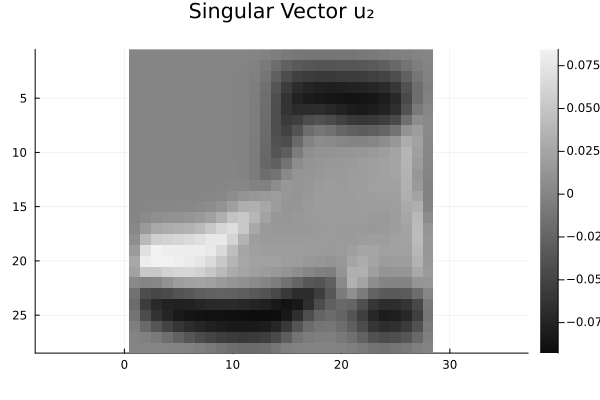

In [19]:
plot_image(U[:, 2], "Singular Vector u₂")

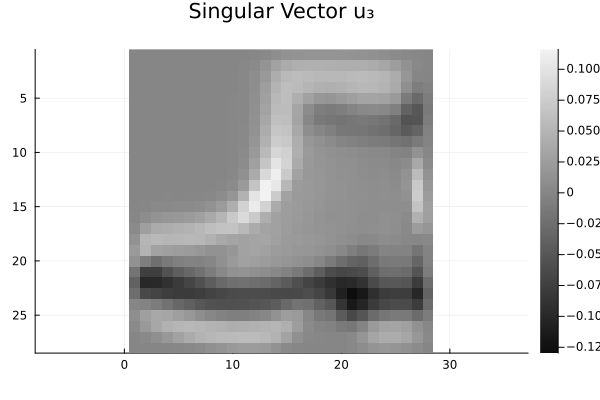

In [20]:
plot_image(U[:, 3], "Singular Vector u₃")

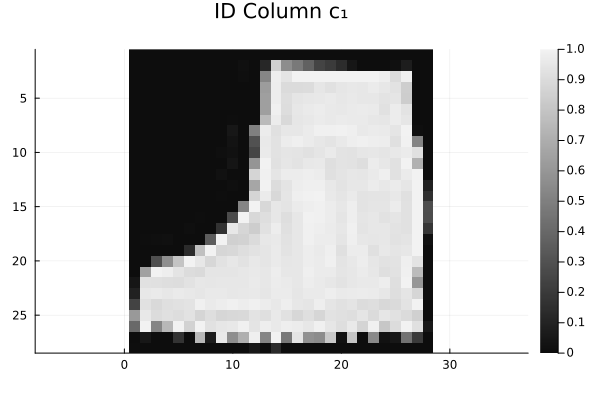

In [21]:
plot_image(C[:, 1], "ID Column c₁")

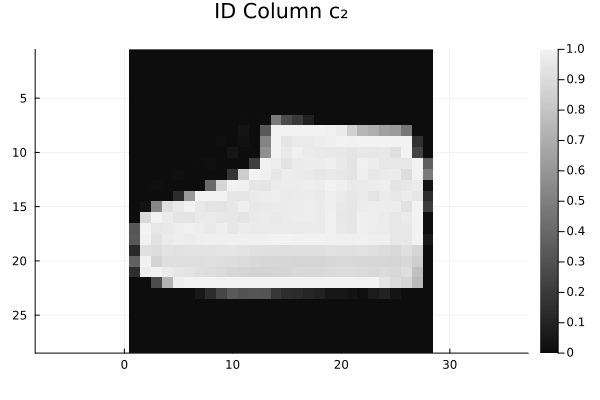

In [22]:
plot_image(C[:, 2], "ID Column c₂")

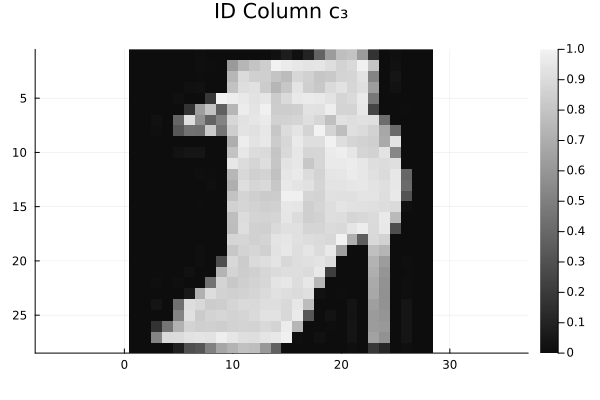

In [23]:
plot_image(C[:, 3], "ID Column c₃")